In [1]:
# data from https://www.kaggle.com/datasets/harunshimanto/epileptic-seizure-recognition
# each chunk contains 178 data points for 1 second
# each data point is the value of the EEG recording at a different point in time
# y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:
# 5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open
# 4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed
# 3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area
# 2 - They recorder the EEG from the area where the tumor was located
# 1 - Recording of seizure activity

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv("Epileptic Seizure Recognition.csv")

In [3]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [5]:
df.shape

(11500, 180)

In [6]:
df['y'].value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

<AxesSubplot:>

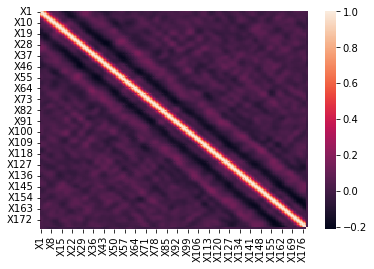

In [7]:
sns.heatmap(df.corr())

In [8]:
df.drop(['Unnamed'],axis=1,inplace=True)
X = pd.DataFrame(df.iloc[:,0:-1])
y = df['y']

In [9]:
#split into test and train
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [10]:
# random forest
rf=RandomForestClassifier()
model=rf.fit(X_train,y_train)
pred=model.predict(X_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Confusion Matrix:
 [[558  12   3  12   0]
 [ 34 306 142  24  57]
 [  9 148 314  36  61]
 [  1   8  10 433 104]
 [  0  46  86 109 362]]
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.95      0.94       585
           2       0.59      0.54      0.57       563
           3       0.57      0.55      0.56       568
           4       0.71      0.78      0.74       556
           5       0.62      0.60      0.61       603

    accuracy                           0.69      2875
   macro avg       0.68      0.69      0.68      2875
weighted avg       0.68      0.69      0.68      2875



In [7]:
pred

array([2, 4, 1, ..., 4, 1, 1])

In [11]:
X_test.iloc[0]

X1      100
X2       67
X3       35
X4       -6
X5      -34
       ... 
X174     15
X175    -15
X176    -16
X177    -29
X178     -7
Name: 9695, Length: 178, dtype: int64

In [15]:
model.predict(pd.DataFrame(X_test.iloc[0]).T)

array([2])